# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_ct = len(cities)
city_ct

600

## Retrieve Weather Data
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
city_num = 1
cities_df = pd.DataFrame({})

# Loop through cities
for city in cities:

    print(f'Processing Record {city_num} of {city_ct} | {city}')
    
    # for city in cities:
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Get weather data. If city is not found, skip.
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        this_city_df = pd.DataFrame(
                            {'City': weather_json['name']
                            ,'Lat': weather_json['coord']['lat']
                            ,'Lon': weather_json['coord']['lon']
                            ,'Max Temp': weather_json['main']['temp_max']
                            ,'Humidity': weather_json['main']['humidity']
                            ,'Cloudiness': weather_json['clouds']['all']
                            ,'Wind Speed': weather_json['wind']['speed']
                            ,'Country': weather_json['sys']['country']
                            ,'Date': weather_json['dt']
                            }, index=[city_num-1])
        
        cities_df = cities_df.append(this_city_df)
        
    except:
        print('City not found. Skipping...')
  
    # Incriment city_num
    city_num += 1

Processing Record 1 of 600 | hilo
Processing Record 2 of 600 | bluff
Processing Record 3 of 600 | nacala
Processing Record 4 of 600 | carnarvon
Processing Record 5 of 600 | laguna
Processing Record 6 of 600 | hithadhoo
Processing Record 7 of 600 | castro
Processing Record 8 of 600 | luderitz
Processing Record 9 of 600 | vaini
Processing Record 10 of 600 | lisakovsk
Processing Record 11 of 600 | ushuaia
Processing Record 12 of 600 | atuona
Processing Record 13 of 600 | olga
Processing Record 14 of 600 | provideniya
Processing Record 15 of 600 | yellowknife
Processing Record 16 of 600 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of 600 | avarua
Processing Record 18 of 600 | kenai
Processing Record 19 of 600 | san cristobal
Processing Record 20 of 600 | bredasdorp
Processing Record 21 of 600 | terrace
Processing Record 22 of 600 | mataura
Processing Record 23 of 600 | sahuaripa
Processing Record 24 of 600 | hobart
Processing Record 25 of 600 | punta arenas
Processing Re

Processing Record 196 of 600 | chagda
City not found. Skipping...
Processing Record 197 of 600 | caravelas
Processing Record 198 of 600 | nemuro
Processing Record 199 of 600 | campos do jordao
Processing Record 200 of 600 | annau
Processing Record 201 of 600 | letlhakane
Processing Record 202 of 600 | maniitsoq
Processing Record 203 of 600 | clyde river
Processing Record 204 of 600 | bubaque
Processing Record 205 of 600 | tabiauea
City not found. Skipping...
Processing Record 206 of 600 | casper
Processing Record 207 of 600 | phan rang
City not found. Skipping...
Processing Record 208 of 600 | kulhudhuffushi
Processing Record 209 of 600 | san quintin
Processing Record 210 of 600 | almaty
Processing Record 211 of 600 | ponta do sol
Processing Record 212 of 600 | mabaruma
Processing Record 213 of 600 | chokurdakh
Processing Record 214 of 600 | porto novo
Processing Record 215 of 600 | hovd
Processing Record 216 of 600 | thurso
Processing Record 217 of 600 | chiredzi
Processing Record 218

Processing Record 388 of 600 | porto velho
Processing Record 389 of 600 | tabukiniberu
City not found. Skipping...
Processing Record 390 of 600 | victoria
Processing Record 391 of 600 | haileybury
Processing Record 392 of 600 | lagoa
Processing Record 393 of 600 | pingtung
Processing Record 394 of 600 | diu
Processing Record 395 of 600 | benito juarez
Processing Record 396 of 600 | hualmay
Processing Record 397 of 600 | guarapari
Processing Record 398 of 600 | thinadhoo
Processing Record 399 of 600 | ugoofaaru
Processing Record 400 of 600 | andenes
Processing Record 401 of 600 | kudat
Processing Record 402 of 600 | burns lake
Processing Record 403 of 600 | le vauclin
Processing Record 404 of 600 | kerema
Processing Record 405 of 600 | samusu
City not found. Skipping...
Processing Record 406 of 600 | lazaro cardenas
Processing Record 407 of 600 | areal
Processing Record 408 of 600 | amderma
City not found. Skipping...
Processing Record 409 of 600 | ozernovskiy
Processing Record 410 of 6

Processing Record 582 of 600 | gariaband
Processing Record 583 of 600 | nome
Processing Record 584 of 600 | krasnoselkup
Processing Record 585 of 600 | chapais
Processing Record 586 of 600 | vagay
Processing Record 587 of 600 | grindavik
Processing Record 588 of 600 | trinidad
Processing Record 589 of 600 | springfield
Processing Record 590 of 600 | xicotencatl
Processing Record 591 of 600 | luau
Processing Record 592 of 600 | linxia
Processing Record 593 of 600 | ornskoldsvik
Processing Record 594 of 600 | barbar
City not found. Skipping...
Processing Record 595 of 600 | kaeo
Processing Record 596 of 600 | mundwa
Processing Record 597 of 600 | haizhou
Processing Record 598 of 600 | puerto carreno
Processing Record 599 of 600 | rocky mountain house
Processing Record 600 of 600 | marienburg


In [4]:
# Export DataFrame as a CSV
cities_df.to_csv("output_data/Weather.csv", index=False, header=True)

# Remove cities with humidity > 100%
cities_df = cities_df.loc[cities_df['Humidity']<=100]

# Display data frame with all cities
cities_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,68.00,77,90,5.75,US,1612595553
1,Bluff,-46.6000,168.3333,58.26,83,0,8.93,NZ,1612595330
2,Nacala,-14.5428,40.6728,87.80,66,40,5.75,MZ,1612595554
3,Carnarvon,-24.8667,113.6333,87.80,100,40,20.71,AU,1612595377
4,Laguna,38.4210,-121.4238,46.00,81,1,4.23,US,1612595554
...,...,...,...,...,...,...,...,...,...
595,Mūndwa,27.0667,73.8167,71.04,22,0,5.79,IN,1612595632
596,Haizhou,34.5817,119.1289,62.85,30,100,12.44,CN,1612595424
597,Puerto Carreño,6.1890,-67.4859,77.97,63,100,6.71,CO,1612595632
598,Rocky Mountain House,52.3668,-114.9188,-13.00,84,100,3.44,CA,1612595632


## Scatter Plots
### City Latitude vs. Max Temperature (F)

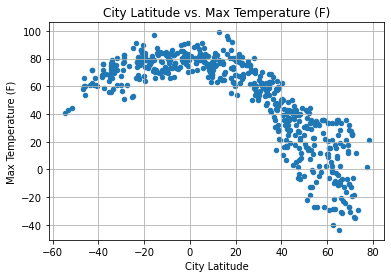

In [5]:
# Create Plot
fig1 = cities_df.plot.scatter(x='Lat'
                             ,y='Max Temp'
                             ,title='City Latitude vs. Max Temperature (F)'
                             ,grid=True
                             )
fig1.set_xlabel('City Latitude')
fig1.set_ylabel('Max Temperature (F)')

# Save as .png file
fig1.figure.savefig('output_data/fig1.png')

### City Latitude vs. Humidity (%)

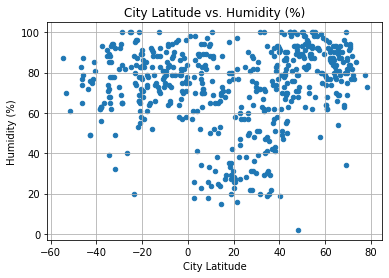

In [6]:
# Create Plot
fig2 = cities_df.plot.scatter(x='Lat'
                             ,y='Humidity'
                             ,title='City Latitude vs. Humidity (%)'
                             ,grid=True
                             )
fig2.set_xlabel('City Latitude')
fig2.set_ylabel('Humidity (%)')

# Save as .png file
fig2.figure.savefig('output_data/fig2.png')

### City Latitude vs. Cloudiness (%)

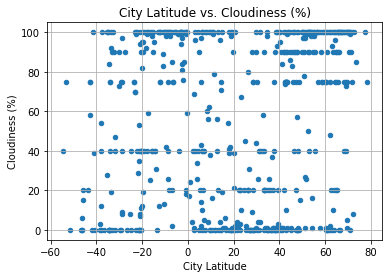

In [7]:
# Create Plot
fig3 = cities_df.plot.scatter(x='Lat'
                             ,y='Cloudiness'
                             ,title='City Latitude vs. Cloudiness (%)'
                             ,grid=True
                             )
fig3.set_xlabel('City Latitude')
fig3.set_ylabel('Cloudiness (%)')

# Save as .png file
fig3.figure.savefig('output_data/fig3.png')

### City Latitude vs. Wind Speed (mph)

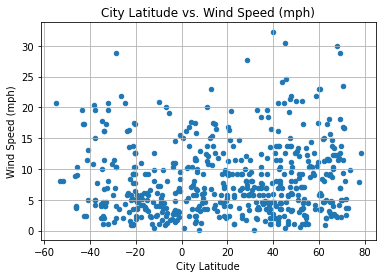

In [8]:
# Create Plot
fig4 = cities_df.plot.scatter(x='Lat'
                             ,y='Wind Speed'
                             ,title='City Latitude vs. Wind Speed (mph)'
                             ,grid=True
                             )
fig4.set_xlabel('City Latitude')
fig4.set_ylabel('Wind Speed (mph)')

# Save as .png file
fig4.figure.savefig('output_data/fig4.png')